# Image Datasets
http://www.cs.cmu.edu/~cil/v-images.html <br>

## High Resolution
https://data.vision.ee.ethz.ch/cvl/DIV2K/

In [1]:
# import the necessary packages
from imutils import paths
import numpy as np
import argparse
import cv2
import os

In [2]:
"""
    Make folder
"""
try:
    output_path = os.path.join(data_path, watermarked_path)
    os.mkdir(data_path)
    os.mkdir(output_path)
except Exception as e:
    print(str(e))

name 'data_path' is not defined


In [3]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

# Loading DIV2K

# Clip Dataset Pleaseeee

In [4]:
import os
import glob
from IPython.display import clear_output
import time
from matplotlib import pyplot as plt

div2k_path = "F:\Datasets\DIV2K High Resolution Dataset"
subset = "DIV2K_train_HR"
div2k_train_path = os.path.join(div2k_path, subset)
filenames = glob.glob(div2k_train_path+"/*/*.png")

In [6]:
output_dataset_path = "F:/Datasets/DIV2K - Watermarks/train"
n_image_copies = 20

if not os.path.isdir(output_dataset_path):
    os.mkdir(output_dataset_path)

total_files = len(filenames)
start_time = time.time()
for i, filename in enumerate(filenames):
    try:
        time_per_iteration = time.time()-start_time
        start_time = time.time()    
        clear_output()
        print(f"{(np.round(i/total_files, 4))*100}% completed")
        print(f"{round(time_per_iteration*(total_files-i)/60)} minutes left")
        for j in range(n_image_copies):
    #         print(filename)
            imagePath = filename
            data_path = "data"
            watermarked_path = "watermarked_images"

            alpha = np.random.uniform(low=0.2, high=0.5, size=(1,))[0]

            # Loading Watermark
            watermark = cv2.imread("data/Remax Logo.png", cv2.IMREAD_UNCHANGED)
            watermark = image_resize(watermark, height=np.random.randint(30,100))

            (wH, wW) = watermark.shape[:2]
            correct = 1
            if correct > 0:
                (B, G, R, A) = cv2.split(watermark)
                B = cv2.bitwise_and(B, B, mask=A)
                G = cv2.bitwise_and(G, G, mask=A)
                R = cv2.bitwise_and(R, R, mask=A)
                watermark = cv2.merge([B, G, R, A])
    #         print('watermark shape: ', watermark.shape)

            # Loading Image
            image = cv2.imread(imagePath)
            image = image_resize(image, height=200)
            image = image[:,:200,:] # get 200 in width too
            if image.shape != (200,200,3):
                continue_loop = True
                break
            (h, w) = image.shape[:2]
    #         print('image shape: ', image.shape)
            image = np.dstack([image, np.ones((h, w), dtype="uint8") * 255])

            overlay = np.zeros((h, w, 4), dtype="uint8")

            x_start = np.random.randint(0,image.shape[0] - watermark.shape[0] - 10)
            x_end = x_start+watermark.shape[0]
            y_start = np.random.randint(0, image.shape[1] - watermark.shape[1] - 10)
            y_end = y_start + watermark.shape[1]

    #         print(f"{x_start}:{x_end}, {y_start}:{y_end}")
            overlay[x_start:x_end, y_start:y_end] = watermark

            # blend the two images together using transparent overlays
            output = image.copy()
            cv2.addWeighted(overlay, alpha, output, 1.0, 0, output);
    #         plt.imshow(output)
            output_file_name = os.path.basename(filename).replace(".png",f"_{j}.png")
            output_name = os.path.join(output_dataset_path, output_file_name)
    #         print(f"output filename: {output_name}")
    #         filename = imagePath[imagePath.rfind(os.path.sep) + 1:]
    #         p = os.path.sep.join((output_path, filename))
            cv2.imwrite(output_name, output)
        if continue_loop:
            continue
    except:
        pass

99.88% completed
0 minutes left


# Preparing Ground Truth

In [7]:
output_ground_path = "F:/Datasets/DIV2K - Watermarks/ground_truth"
if not os.path.isdir(output_ground_path):
    os.mkdir(output_ground_path)
    
total_files = len(filenames)
start_time = time.time()
for i, filename in enumerate(filenames):
    try:
        time_per_iteration = time.time()-start_time
        start_time = time.time()    
        clear_output()
        print(f"{(np.round(i/total_files, 4))*100}% completed")
        print(f"{round(time_per_iteration*(total_files-i)/60)} minutes left")
        image = cv2.imread(filename)
        image = image_resize(image, height=200)
        image = image[:,:200,:] # get 200 in width too
        if image.shape != (200,200,3):
            continue
        for j in range(n_image_copies):
            output_file_name = os.path.basename(filename).replace(".png",f"_{j}.png")
            output_name = os.path.join(output_ground_path, output_file_name)
            cv2.imwrite(output_name, image)
    except:
        pass

99.88% completed
0 minutes left


# Loading CIFAR

In [74]:
cifar_path = "F:/Datasets/cifar-100-python/cifar-100-python"
train_path = "train"
train_path = os.path.join(cifar_path,train_path)

In [75]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
dataset = unpickle(train_path)

In [80]:
dataset.keys()

TypeError: 'dict_keys' object is not subscriptable

In [84]:
cifar_filenames = list(dataset[list(dataset.keys())[0]])

In [91]:
img = list(dataset[list(dataset.keys())[4]])[0]

In [96]:
img.shape

(3072,)

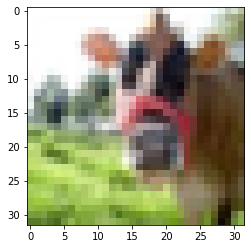

In [105]:
plt.imshow(img.reshape(3, 32, 32).transpose(1,2,0))
# .astype("uint8").transpose(0,2,3,1)

In [93]:
img.shape

(3072,)

<function glob.glob(pathname, *, recursive=False)>